<a href="https://colab.research.google.com/github/kornilovd203-oss/analytics---peoject/blob/main/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задачи проекта:
1. Очиститить и подготовить датафрейм для анализа
2. Составить и проверить гипотезы по покупателям.
3. Сегментировать покупателей по категориям. Предложить способы стимулирования отстающих категорий и поощрения категорий с хорошей покупательской характеристикой.

In [ ]:
from google.colab import files
import pandas as pd
uploaded_1 = files.upload()

Saving retail_sales_dataset.csv to retail_sales_dataset.csv


In [ ]:
df = pd.read_csv(next(iter(uploaded_1)), sep=',')
display(df.head(5))

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


1. Анализ данных на выбросы, пропущенные значения и опечатки.

In [ ]:
print(df.info())

df['Date'] = pd.to_datetime(df['Date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


In [ ]:
print(df['Gender'].unique())
print(len(df['Gender'].unique()))
print(df['Product Category'].unique())
print(len(df['Product Category'].unique()))

['Male' 'Female']
2
['Beauty' 'Clothing' 'Electronics']
3


64
18
42.0


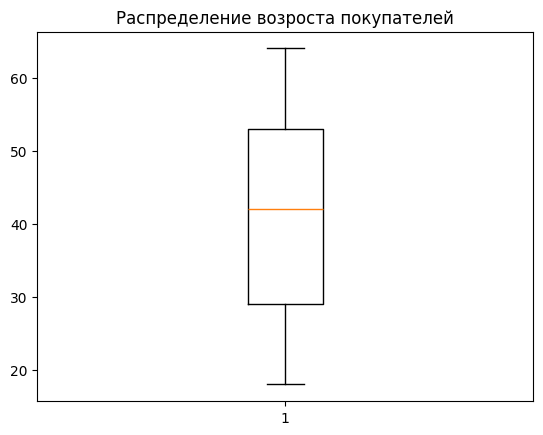

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df['Age'])
plt.title('Распределение возроста покупателей')

print(max(df['Age']))
print(min(df['Age']))
print((df['Age']).median())
# Среди возроста покупателей нет выбросов и экстремальных значений. Минимальный возрост покупателя 18 лет, максимальный возрост 64 года.
# Медиана - 42 года.

Text(0, 0.5, 'Количество товаров шт.')

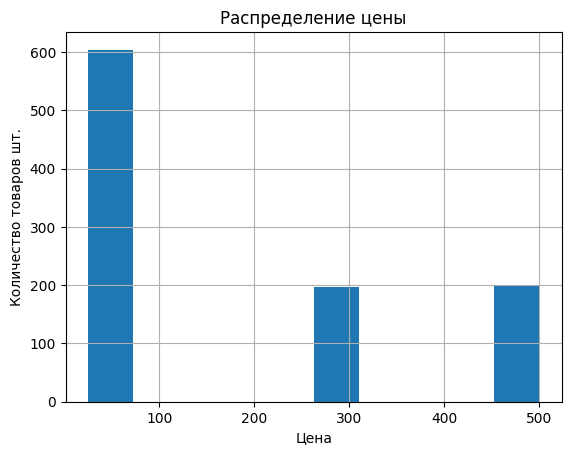

In [ ]:
plt.hist(df['Price per Unit'])
plt.title('Распределение цены')
plt.grid('True')
plt.xlabel('Цена')
plt.ylabel('Количество товаров шт.')

# 1. В распределении ценовых категорий отсутсвуют экстремальные значения.
# 2. Существуют 3 основных ценовых категории.
# 2.1 От 25 до 75 рублей.
# 2.2 От 260 до 305 рублей.
# 2.3 От 455 до 500 рублей.

Text(0, 0.5, 'Количество заказов')

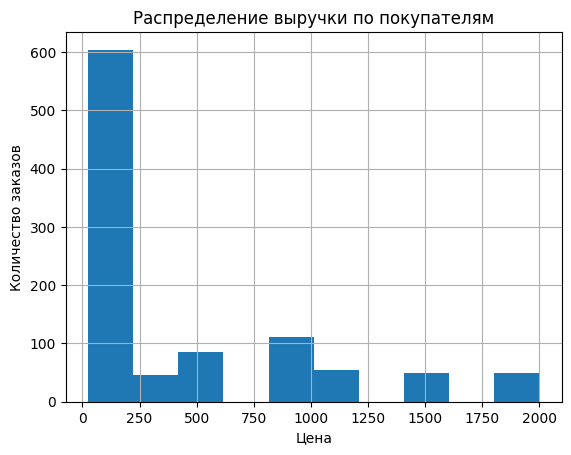

In [ ]:
plt.hist(df['Total Amount'])
plt.title('Распределение выручки по покупателям')
plt.grid('True')
plt.xlabel('Цена')
plt.ylabel('Количество заказов')
# Наибольшее количество чеков приносят выручку в размере 600 рублей. Наибольшая выручка с чека - 2000 рублей. Экстремальные значения в данных отсутствуют.

In [ ]:
print(df['Quantity'].unique())
# Количество товаров в чеке от 1 до 4.

[3 2 1 4]


In [ ]:
print(df.isna().sum()) # в данных нет пропусков

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [ ]:
print(df.duplicated().sum()) # дубликатов нет

0


In [ ]:
df['Revenue'] = df['Total Amount']

In [ ]:
df['month'] = df['Date'].dt.month # Создание столбца с месяцем.
df['day_name'] = df['Date'].dt.day_of_week # Создание столбца с днем недели.
display(df)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Revenue,month,day_name
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150,11,4
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1000,2,0
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30,1,4
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500,5,6
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,50,5,1
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,90,11,4
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,100,10,6
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,150,12,1


2. Анализ распределения выручки по месяцам и дням недели.

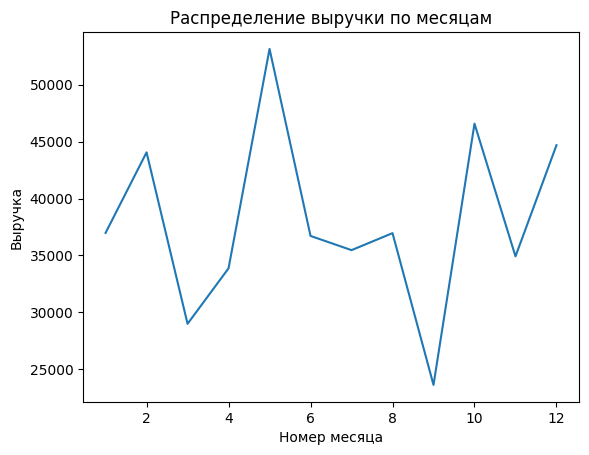

In [ ]:
month_revenue = df.groupby(df['month'])['Total Amount'].sum().reset_index()

plt.plot(month_revenue['month'], month_revenue['Total Amount'])
plt.title('Распределение выручки по месяцам')
plt.xlabel('Номер месяца')
plt.ylabel('Выручка')
plt.show()

# Пики продаж перед летним сезоном и перед зимним сезоном, а спады продаж в конце сезона.

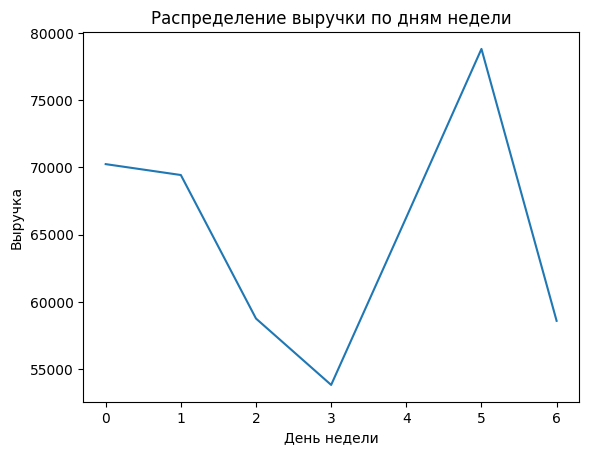

In [ ]:
day_name_revenue = df.groupby(df['day_name'])['Total Amount'].sum().reset_index()

plt.plot(day_name_revenue['day_name'], day_name_revenue['Total Amount'])
plt.title('Распределение выручки по дням недели')
plt.xlabel('День недели')
plt.ylabel('Выручка')
plt.show()

# Пик продаж выпадает на конец рабочей недели, спад продаж выпадает на среду(середину рабочей недели).
# Перед выходными люди активно закупаются.

3. Создание категориальных столбцов.

In [ ]:
# категориальный столбец возроста

b = (64 - 18)/3
print(b)# размах категории

def category_year(age):
  if 18 <= age <= 33:
    return 'Молодой'
  elif 33 < age <= 48:
    return 'Средний'
  else:
    return 'Пожилой'

df['year_category'] = df['Age'].apply(category_year)

display(df)


15.333333333333334


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Revenue,month,day_name,year_category
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150,11,4,Средний
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1000,2,0,Молодой
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30,1,4,Пожилой
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500,5,6,Средний
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100,5,5,Молодой
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,50,5,1,Пожилой
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,90,11,4,Пожилой
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,100,10,6,Молодой
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,150,12,1,Средний


In [ ]:
# столбец сезона покупки

def category_season(date):
  if date in [12,1,2]:
    return 'Зима'
  elif date in [3,4,5]:
    return 'Весна'
  elif date in [6,7,8]:
    return 'Лето'
  else:
    return 'Осень'


df['year_season'] = df['month'].apply(category_season)

display(df)



,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Revenue,month,day_name,year_category,year_season,orders_recency,order_recency
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150,11,4,Средний,Осень,721 days,722 days
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1000,2,0,Молодой,Зима,991 days,992 days
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30,1,4,Пожилой,Зима,1036 days,1037 days
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500,5,6,Средний,Весна,908 days,909 days
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100,5,5,Молодой,Весна,923 days,924 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,50,5,1,Пожилой,Весна,913 days,914 days
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,90,11,4,Пожилой,Осень,728 days,729 days
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,100,10,6,Молодой,Осень,747 days,748 days
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,150,12,1,Средний,Зима,710 days,711 days


0


4. Составление сводных таблиц по выручке и среднему чеку.

In [ ]:
final_1 = df.pivot_table(
    values = 'Revenue',
    index = ['year_category',	'year_season'],
    columns = ['Gender','Product Category'],
    aggfunc = 'sum',
    margins = True,
    margins_name = 'Итого'
)

display(final_1)

Gender                    Female                        Male           \
Product Category          Beauty Clothing Electronics Beauty Clothing   
year_category year_season                                               
Молодой       Весна         6195     4350        6400   7475    10005   
              Зима          6990     8725        5815   5905    10660   
              Лето          3385     6300        5280   9570     5860   
              Осень         7265     8925        6090   3255     5275   
Пожилой       Весна         5410     6795        3130   2350    10715   
              Зима          5125     2515        8945   2180     4710   
              Лето          6620     7060       10720   6625     3360   
              Осень         3130    10915        4050   3680     4200   
Средний       Весна        10370     8980        2920   3100     5615   
              Зима          6740     8395       11175  13425     4750   
              Лето          8905     3150        4420   1770     5145   
              Осень         4695     5165        7790   9350     4010   
Итого                      74830    81275       76735  68685    74305   

Gender                                  Итого  
Product Category          Electronics          
year_category year_season                      
Молодой       Весна              5830   40255  
              Зима               2540   40635  
              Лето               4525   34920  
              Осень              8335   39145  
Пожилой       Весна              8915   37315  
              Зима              10185   33660  
              Лето               9500   43885  
              Осень              7430   33405  
Средний       Весна              7455   38440  
              Зима               6950   51435  
              Лето               6945   30335  
              Осень              1560   32570  
Итого                           80170  456000

In [ ]:
final_2 = df.pivot_table(
    values = 'Revenue',
    index = 'year_category',
    columns = 'year_season',
    aggfunc = 'sum',
    margins = True,
    margins_name = 'Итого'
)

display(final_2)

year_season,Весна,Зима,Лето,Осень,Итого
year_category,,,,,
Молодой,40255,40635,34920,39145,154955
Пожилой,37315,33660,43885,33405,148265
Средний,38440,51435,30335,32570,152780
Итого,116010,125730,109140,105120,456000


In [ ]:
final_3 = df.pivot_table(
    values = 'Revenue',
    index = 'year_category',
    columns = 'Gender',
    aggfunc = 'sum',
    margins = True,
    margins_name = 'Итого'
)

display(final_3)

Gender,Female,Male,Итого
year_category,,,
Молодой,75720,79235,154955
Пожилой,74415,73850,148265
Средний,82705,70075,152780
Итого,232840,223160,456000


In [ ]:
final_4 = df.pivot_table(
    values = 'Revenue',
    index = 'year_category',
    columns = 'Product Category',
    aggfunc = 'sum',
    margins = True,
    margins_name = 'Итого'
)

display(final_4)

Product Category,Beauty,Clothing,Electronics,Итого
year_category,,,,
Молодой,50040,60100,44815,154955
Пожилой,35120,50270,62875,148265
Средний,58355,45210,49215,152780
Итого,143515,155580,156905,456000


In [ ]:
final_5 = df.pivot_table(
    values = 'Revenue',
    index = 'Product Category',
    columns = 'Gender',
    aggfunc = 'sum',
    margins = True,
    margins_name = 'Итого'
)

display(final_5)

Gender,Female,Male,Итого
Product Category,,,
Beauty,74830,68685,143515
Clothing,81275,74305,155580
Electronics,76735,80170,156905
Итого,232840,223160,456000


In [ ]:
# сводная таблица по среднему чеку
mean_final_1 = df.pivot_table(
    values = 'Revenue',
    index = ['year_category',	'year_season'],
    columns = ['Gender','Product Category'],
    aggfunc = 'mean',
    margins = True,
    margins_name = 'Итого'
)

display(mean_final_1)

Gender                         Female                                 Male  \
Product Category               Beauty    Clothing Electronics       Beauty   
year_category year_season                                                    
Молодой       Весна        442.500000  435.000000  581.818182   830.555556   
              Зима         367.894737  727.083333  387.666667   492.083333   
              Лето         338.500000  484.615385  352.000000   736.153846   
              Осень        484.333333  743.750000  435.000000   191.470588   
Пожилой       Весна        300.555556  295.434783  313.000000   261.111111   
              Зима         394.230769  228.636364  596.333333   272.500000   
              Лето         509.230769  543.076923  466.086957   368.055556   
              Осень        313.000000  642.058824  506.250000   408.888889   
Средний       Весна        610.000000  408.181818  265.454545   281.818182   
              Зима         561.666667  599.642857  558.750000  1032.692308   
              Лето         685.000000  196.875000  442.000000   196.666667   
              Осень        391.250000  469.545455  432.777778   719.230769   
Итого                      450.783133  467.097701  451.382353   487.127660   

Gender                                                  Итого  
Product Category             Clothing Electronics              
year_category year_season                                      
Молодой       Весна        555.833333  530.000000  551.438356  
              Зима         444.166667  211.666667  432.287234  
              Лето         532.727273  452.500000  485.000000  
              Осень        479.545455  520.937500  460.529412  
Пожилой       Весна        428.600000  636.785714  376.919192  
              Зима         336.428571  485.000000  410.487805  
              Лето         240.000000  558.823529  447.806122  
              Осень        466.666667  323.043478  439.539474  
Средний       Весна        431.923077  414.166667  417.826087  
              Зима         475.000000  772.222222  659.423077  
              Лето         428.750000  534.230769  415.547945  
              Осень        250.625000  195.000000  417.564103  
Итого                      419.802260  466.104651  456.000000

In [ ]:
mean_final_2 = df.pivot_table(
    values = 'Revenue',
    index = 'year_category',
    columns = 'year_season',
    aggfunc = 'mean',
    margins = True,
    margins_name = 'Итого'
)

display(mean_final_2)

year_season,Весна,Зима,Лето,Осень,Итого
year_category,,,,,
Молодой,551.438356,432.287234,485.000000,460.529412,478.256173
Пожилой,376.919192,410.487805,447.806122,439.539474,417.647887
Средний,417.826087,659.423077,415.547945,417.564103,475.950156
Итого,439.431818,495.000000,449.135802,439.832636,456.000000


In [ ]:
mean_final_3 = df.pivot_table(
    values = 'Revenue',
    index = 'year_category',
    columns = 'Gender',
    aggfunc = 'mean',
    margins = True,
    margins_name = 'Итого'
)

display(mean_final_3)

Gender,Female,Male,Итого
year_category,,,
Молодой,473.250000,483.140244,478.256173
Пожилой,427.672414,408.011050,417.647887
Средний,469.914773,483.275862,475.950156
Итого,456.549020,455.428571,456.000000


In [ ]:
mean_final_4 = df.pivot_table(
    values = 'Revenue',
    index = 'year_category',
    columns = 'Product Category',
    aggfunc = 'mean',
    margins = True,
    margins_name = 'Итого'
)

display(mean_final_4)

Product Category,Beauty,Clothing,Electronics,Итого
year_category,,,,
Молодой,459.082569,541.441441,430.913462,478.256173
Пожилой,358.367347,398.968254,479.961832,417.647887
Средний,583.550000,396.578947,459.953271,475.950156
Итого,467.475570,443.247863,458.786550,456.000000


In [ ]:
mean_final_5 = df.pivot_table(
    values = 'Revenue',
    index = 'Product Category',
    columns = 'Gender',
    aggfunc = 'sum',
    margins = True,
    margins_name = 'Итого'
)

display(mean_final_5)

Gender,Female,Male,Итого
Product Category,,,
Beauty,74830,68685,143515
Clothing,81275,74305,155580
Electronics,76735,80170,156905
Итого,232840,223160,456000


По графикам можно оценить, что выручка и средний чек в магазине существенно не различаются ни в одной из категорий. Спрос стабилен в любых случаях и условиях.

In [ ]:
# Предположим что мужчин больше всего готовы тратиться на красоту(средний чек).
# Используем тест Тест Крускала-Уоллиса для проверки значимости.
# Выборки являются независимыми и количественными.

male_beauty = mean_final_1['Male']['Beauty']
male_Clothing = mean_final_1['Male']['Clothing']
male_Electronics = mean_final_1['Male']['Electronics']

male_beauty = male_beauty.to_frame()
male_Clothing = male_Clothing.to_frame()
male_Electronics = male_Electronics.to_frame()

male_beauty = male_beauty['Beauty'][:12]
male_Clothing = male_Clothing['Clothing'][:12]
male_Electronics = male_Electronics['Electronics'][:12]

from scipy.stats import shapiro,levene

print(shapiro(male_beauty))
print(shapiro(male_Clothing))
print(shapiro(male_Electronics))

# Отсутсвует нормальное распределение. Тест использовать нельзя.

ShapiroResult(statistic=np.float64(0.8863033693237417), pvalue=np.float64(0.1056027405304033))
ShapiroResult(statistic=np.float64(0.8921995859888427), pvalue=np.float64(0.12579448275582095))
ShapiroResult(statistic=np.float64(0.9561737865738326), pvalue=np.float64(0.7281401881211607))


In [ ]:
# В таком случае используем тест Манна-Уитни и сравним две выборки с выборкой beauty.

from scipy.stats import mannwhitneyu

print(mannwhitneyu(male_beauty,male_Clothing, alternative = 'greater'))
print(mannwhitneyu(male_beauty,male_Electronics, alternative = 'greater'))

# p-value значительно больше 0,05. Нет статистически значимых доказательств, что средний чек на товары beauty у мужчин больше.

MannwhitneyuResult(statistic=np.float64(70.0), pvalue=np.float64(0.5573830427633992))
MannwhitneyuResult(statistic=np.float64(65.0), pvalue=np.float64(0.6674972289489854))


In [ ]:
#rfm анализ
import pandas as pd

# 1 рассчитать кол-во дней от анализа до последней покупки.
df['orders_recency'] = pd.to_datetime('2025-11-14') - pd.to_datetime(df['Date'].dt.date)

# 2 Необходимо сгруппировать данные для каждого пользователя и данные для RFM анализа.

rfm = df.groupby('Customer ID').agg(
    recency = ('orders_recency', lambda x: x.min().days),
    frequeny = ('Transaction ID', 'nunique'),
    monetary_value = ('Total Amount', 'sum')
).reset_index()

# 3 определить параметр разбивки по группам по каждому признаку.

# Создание RFM сегментов
rfm['r'] = pd.qcut(rfm['recency'], q=3, labels=[3, 2, 1])
rfm['f'] = pd.cut(rfm['frequeny'], [0, 2, 10, 1000], labels=[1, 2, 3])
rfm['m'] = pd.qcut(rfm['monetary_value'], q=3, labels=[1, 2, 3])

display(rfm)


# 4 определение rfm иднекса сегмента

rfm[['r','f','m']] = rfm[['r','f','m']].astype('str')
rfm['rfm_group'] = rfm['r'] + rfm['f'] + rfm['m']

rfm[['r','f','m']] = rfm[['r','f','m']].astype('int')
rfm['rfm_sum'] = rfm[['r','f','m']].sum(axis =1)

# 5 Необходимо сгруппировать данные по сегментам и посчитать их размер

rfm_group_1 = rfm.groupby('rfm_group').agg(
    {
        'Customer ID' : 'nunique',
        'rfm_sum' : 'mean'
    }
).reset_index()

display(rfm_group.sort_values(by = 'Customer ID'))



,Customer ID,recency,frequeny,monetary_value,r,f,m
0,CUST001,721,1,150,3,1,2
1,CUST002,991,1,1000,1,1,3
2,CUST003,1036,1,30,1,1,1
3,CUST004,908,1,500,2,1,2
4,CUST005,923,1,100,2,1,2
...,...,...,...,...,...,...,...
995,CUST995,929,1,30,1,1,1
996,CUST996,913,1,50,2,1,1
997,CUST997,728,1,90,3,1,1
998,CUST998,747,1,100,3,1,2


,rfm_group,Customer ID,rfm_sum
2,113,94,5.0
8,313,102,7.0
5,213,103,6.0
3,211,108,4.0
1,112,116,4.0
6,311,117,5.0
7,312,118,6.0
4,212,118,5.0
0,111,124,3.0


r    0
f    0
m    0
dtype: int64


In [ ]:
import plotly.express as px
fig = px.treemap(rfm_group_1,
                 path= ['rfm_group'],
                 values = 'Customer ID',
                 color= 'rfm_sum',
                 color_continuous_scale= 'Sunset',
                 title = 'RFM сегментация пользователей')
fig.show()

Вывод: все пользователи совершили по одной покупке из-за этого frequeny в данном анализе не имет смысла.

Принимаем решение сегментировать пользователей не по количеству совершенных покупок, а по количеству позиций в чеке. Данный анализ будет более информативный.

In [ ]:
rfm_2 = df.groupby('Customer ID').agg(
    recency = ('orders_recency', lambda x: x.min().days),
    frequeny = ('Quantity', 'unique'),
    monetary = ('Total Amount', 'sum')
).reset_index()

rfm_2['r'] = pd.qcut(rfm_2['recency'], q = 3, labels = [3, 2, 1])
rfm_2['f'] = pd.cut(rfm_2['frequeny'], [0, 2, 3, 4], labels = [1, 2, 3]) # во frequeny используем 3 интервала.
#  1-2 покупки в первый интервал(из-за этого он в него попало наибольшее количество покупателей). 3 покупки во второй интервал. 4 покупки в третий интервал.

rfm_2['m'] = pd.qcut(rfm_2['monetary'], q = 3, labels=[1, 2, 3])

# определение индекса сегмента
rfm_2[['r','f','m']] = rfm_2[['r','f','m']].astype('str')
rfm_2['rfm_group'] = rfm_2['r'] + rfm_2['f'] + rfm_2['m']

rfm_2[['r','f','m']] = rfm_2[['r','f','m']].astype('int')
rfm_2['rfm_sum'] = rfm_2[['r','f','m']].sum(axis =1)

#группируем данные по сгментам и считаем их размер
rfm_group_2 = rfm_2.groupby('rfm_group').agg({
    'Customer ID' : 'nunique',
        'rfm_sum' : 'mean'
} ).reset_index()

display(rfm_group_2.sort_values(by = 'Customer ID'))



,rfm_group,Customer ID,rfm_sum
12,222,10,6.0
20,322,15,7.0
4,122,17,5.0
11,221,22,5.0
18,313,26,7.0
2,113,29,5.0
10,213,29,6.0
19,321,31,6.0
5,123,32,6.0
7,133,33,7.0


In [ ]:
import plotly.express as px
fig = px.treemap(rfm_group_2,
                 path= ['rfm_group'],
                 values = 'Customer ID',
                 color= 'rfm_sum',
                 color_continuous_scale= 'Sunset',
                 title = 'RFM сегментация пользователей')
fig.show()

Отстающие покупатели являются наиболее многочисленной категорией. Для их возврата в магазин мы можем предложить целевые акции со скидками на популярные товары или персональные промокоды.

Значительную долю также составляют покупатели, недавно совершившие покупки, но с низким средним чеком и количеством товаров. Для этой аудитории эффективны будут акции, направленные на повышение среднего чека:

1. Бесплатная доставка при заказе от определенной суммы.
2. Подарки за превышение пороговой стоимости корзины.

Основное внимание уделим именно этим двум сегментам. Остальные группы покупателей сравнительно невелики по размеру и в основном демонстрируют хорошие покупательские характеристики, не требующие активного вмешательства.